In [32]:
df = pd.read_csv(r"C:\Users\user\Downloads\abc_company.csv")

In [34]:
import numpy as np

# Replace height column with random integers between 150 and 180
df['height'] = np.random.randint(150, 181, size=len(df))

In [36]:
print(df['height'].describe())

count    458.000000
mean     165.189956
std        8.932089
min      150.000000
25%      157.000000
50%      165.500000
75%      173.000000
max      180.000000
Name: height, dtype: float64


Team Counts:
 team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
New York Knicks           16
Milwaukee Bucks           16
Brooklyn Nets             15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Denver Nuggets            15
Washington Wizards        15
Miami Heat                15
Charlotte Hornets         15
Atlanta Hawks             15
San Antonio Spurs         15
Houston Rockets           15
Boston Celtics            15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Sacramento Kings          15
Phoenix Suns              15
Los Angeles Lakers        15
Los Angeles Clippers      15
Golden State Warriors     15
Toronto Raptors           15
Philadelphia 76ers        15
Dallas Mavericks          15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

Team Percentage:
 team
New Orleans Pelicans      4.15
Memphis Grizzlies         3.93

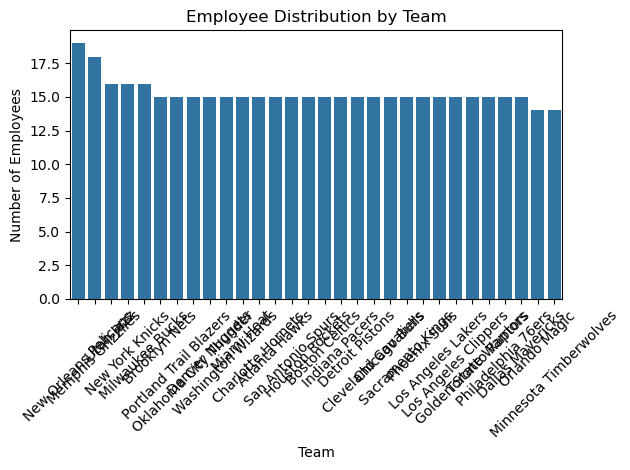

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Check and clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Step 2: Value counts
team_counts = df['team'].value_counts()
team_percent = df['team'].value_counts(normalize=True) * 100

# Step 3: Print results
print("Team Counts:\n", team_counts)
print("\nTeam Percentage:\n", team_percent.round(2))

# Step 4: Visualization
sns.countplot(x='team', data=df, order=team_counts.index)
plt.xticks(rotation=45)
plt.title("Employee Distribution by Team")
plt.xlabel("Team")
plt.ylabel("Number of Employees")
plt.tight_layout()
plt.show()

age_group
25-35    281
<25      154
36-45     23
46+        0
Name: count, dtype: int64


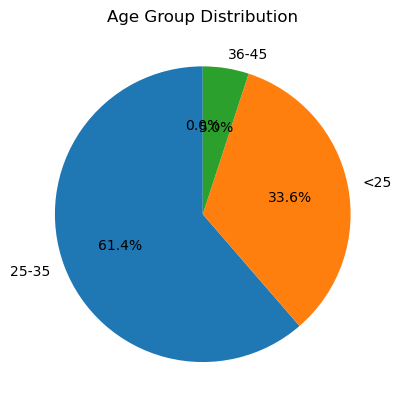

In [53]:
bins = [0, 24, 35, 45, 100]
labels = ['<25', '25-35', '36-45', '46+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

age_group_counts = df['age_group'].value_counts()
print(age_group_counts)

# Pie chart
age_group_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Age Group Distribution")
plt.ylabel("")
plt.show()

Team with highest total salary: Cleveland Cavaliers
Position with highest total salary: C


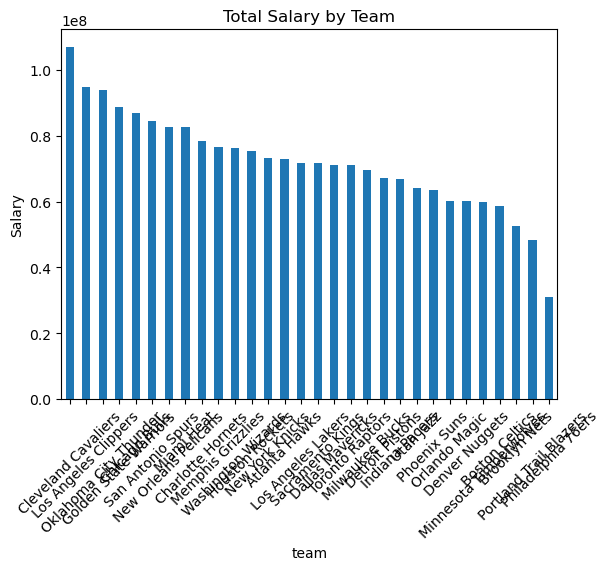

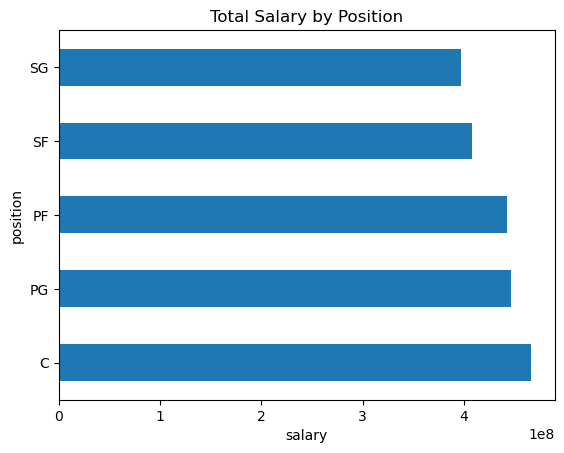

In [57]:
# Total salary by team
team_salary = df.groupby('team')['salary'].sum().sort_values(ascending=False)
print("Team with highest total salary:", team_salary.idxmax())

# Total salary by position
position_salary = df.groupby('position')['salary'].sum().sort_values(ascending=False)
print("Position with highest total salary:", position_salary.idxmax())

# Visuals
team_salary.plot(kind='bar', title='Total Salary by Team')
plt.ylabel("Salary")
plt.xticks(rotation=45)
plt.show()

position_salary.plot(kind='barh', title='Total Salary by Position')
plt.xlabel("salary")
plt.show()

Correlation between age and salary: 0.21


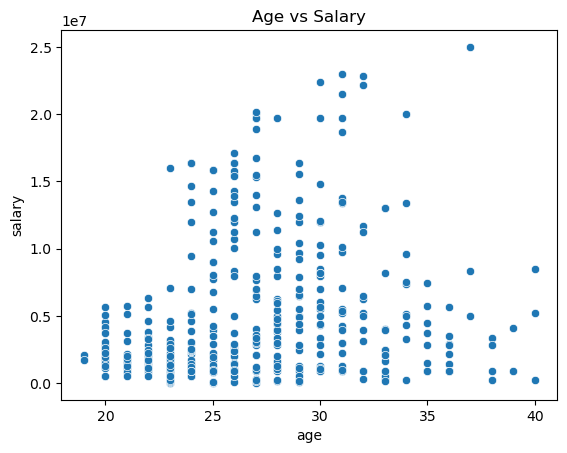

In [63]:
corr_value = df[['age', 'salary']].corr().iloc[0,1]
print("Correlation between age and salary:", round(corr_value, 2))

# Scatter plot
sns.scatterplot(x='age', y='salary', data=df)
plt.title("Age vs Salary")
plt.show()